In [40]:
import pandas as pd
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from skimage import io
from torch.utils.data import DataLoader
import os
import json
import matplotlib.pyplot as plt

In [2]:
class ImageLoader(Dataset):
    def __init__(self, json_file, root_dir, transform = None):
        self.annotations = pd.read_json(json_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return(len(self.annotations))
        
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
          
        if self.transform:
            image = self.transform(image)
        
        return image

In [3]:
pd.DataFrame({'Image' : ['myFace.jpg']}).to_json('imageData.json')

In [4]:
image_data = ImageLoader(json_file = 'imageData.json', root_dir = 'image',
                           transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Resize(size = (100, 100)),
                               #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) ### Pixel range [-1,1]
                           ]))
image_loader = DataLoader(dataset = image_data, batch_size = 1, shuffle = False)

In [5]:
first_batch = iter(image_loader)
image = first_batch.next()

In [6]:
image = image.numpy()[0]
image = np.transpose(image, (1, 2, 0))

In [7]:
np.shape(image)

(100, 100, 3)

In [8]:
def imshow(img):
    plt.imshow(img)

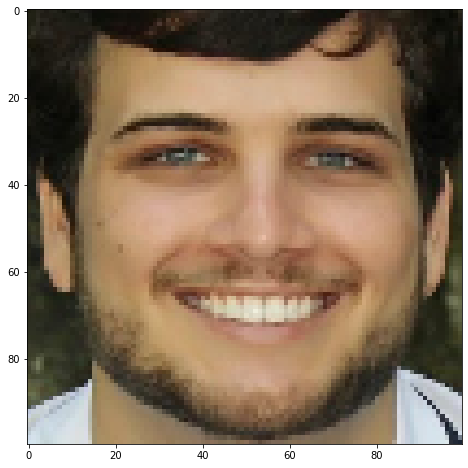

In [9]:
fig = plt.figure(figsize = (10, 8))
imshow(image)

In [10]:
import cv2

In [11]:
img2 = image - cv2.GaussianBlur(image, (3,3), 0)

In [12]:
img2.shape

(100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


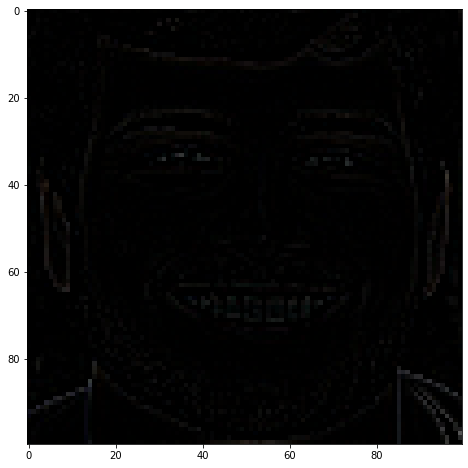

In [13]:
fig = plt.figure(figsize = (10, 8))
imshow(img2)

In [14]:
img3 = np.sum(img2, axis = 2)

In [15]:
img3.shape

(100, 100)

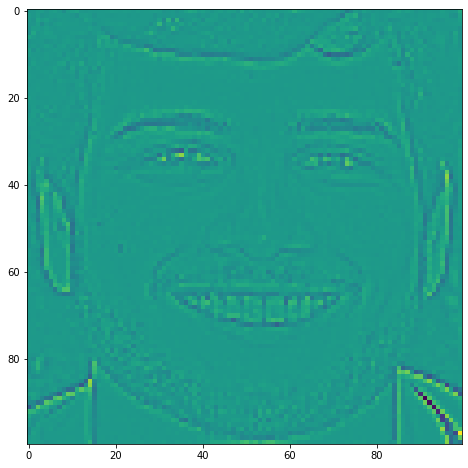

In [16]:
fig = plt.figure(figsize = (10, 8))
imshow(img3)

# Noise Depth = 1

In [17]:
imgC1 = img3.copy()

In [18]:
# Computes the 2D discrete Fourier Transform, then shifts the zero-frequency component to the center of the spectrum
sf = np.fft.fftshift(np.fft.fft2(imgC1))

In [19]:
sf.shape

(100, 100)

In [20]:
sf

array([[-1.12801492e+01-4.44089210e-16j, -1.35685312e+01-1.06145616e+01j,
        -6.93791800e+00-1.09558228e+01j, ...,
         5.42351520e+00+8.24687024e+00j, -6.93791800e+00+1.09558228e+01j,
        -1.35685312e+01+1.06145616e+01j],
       [-9.98519847e+00-8.38672390e+00j, -5.66474684e+00-8.34812723e+00j,
         2.27622315e+00-1.02839174e+01j, ...,
        -4.17551265e+00+7.86738846e+00j, -1.16019814e+01+3.76156068e+00j,
        -9.12262709e+00-1.06846488e+00j],
       [-4.16786801e+00-1.05675675e+01j,  3.32239848e+00-4.17477007e+00j,
         6.17940348e-05-6.72202673e+00j, ...,
        -5.42180368e+00+4.08734967e+00j, -4.91016018e+00+9.09726215e-01j,
        -8.83358497e+00-5.13370304e+00j],
       ...,
       [ 2.06990179e+00+7.03865361e+00j, -3.10238326e+00+1.31828326e+01j,
        -8.29229357e+00+8.97006396e+00j, ...,
         7.77608746e+00-5.70996655e+00j,  3.84343535e+00-1.07286822e-01j,
         6.50365124e+00+3.34999918e+00j],
       [-4.16786801e+00+1.05675675e+01j, -8.

In [21]:
# Calculates epsilon
eps = np.max(sf) * 1e-2

In [22]:
eps

(0.23431282419344224+0.1754694124535436j)

In [23]:
s1 = np.log(sf + eps) - np.log(eps)

In [24]:
s1.shape

(100, 100)

In [25]:
s1

array([[3.63067754+2.48293208j, 4.05784858-3.12015463j,
        3.7696791 -2.76989306j, ..., 3.54560411+0.33649648j,
        3.79298539+1.47007805j, 4.07067216+1.81849158j],
       [3.77385058-3.08447718j, 3.51213825-2.80004855j,
        3.57179692-1.97013795j, ..., 3.42088811+1.38365564j,
        3.71591239+2.16540958j, 3.41825689-3.68423651j],
       [3.63649109-2.57542058j, 2.90598031-1.48668211j,
        3.10807758-2.17778674j, ..., 3.13273588+1.81095334j,
        2.79713974+2.27076827j, 3.52368628-3.26134241j],
       ...,
       [3.25311019+0.61885843j, 3.84316916+1.13951247j,
        3.72903211+1.65028528j, ..., 3.50436761-1.2473782j ,
        2.63418251-0.62605724j, 3.25724378-0.16072213j],
       [3.66566002+1.27900864j, 3.54164454+1.94570238j,
        2.78308815-3.62860915j, ..., 3.49358285+0.19194928j,
        3.16023326+0.89405339j, 2.95467715+0.24264523j],
       [3.79164193+1.7782367j , 3.42293379+2.35976779j,
        3.70670682-3.47878602j, ..., 3.58355244-0.14554819j,
 

In [26]:
sf = (s1 * 255 / np.max(s1))

In [27]:
sf

array([[199.84395691+117.57566393j, 202.2341799 -178.63705419j,
        188.33352306-159.18329497j, ..., 187.67900724  +4.99337004j,
        204.75112075 +63.72525817j, 220.6038212  +81.05435595j],
       [187.42575542-175.74310898j, 174.68067495-159.84648612j,
        180.79186964-116.41290076j, ..., 184.87182092 +60.51328752j,
        203.1890126 +100.5708612j , 166.57513557-206.01205157j],
       [182.02558603-148.47822422j, 147.50691975 -88.60096551j,
        155.65955238-125.67222698j, ..., 171.2480928  +84.01853262j,
        155.24566407+109.40394256j, 173.63519867-184.14861038j],
       ...,
       [173.30763089 +20.89159074j, 206.20600722 +46.16007131j,
        202.03332079 +73.43201066j, ..., 179.83522624 -78.1593236j ,
        136.29593186 -42.36441832j, 170.73178407 -20.12356409j],
       [197.37011642 +54.13258578j, 193.23656145 +89.64024185j,
        133.36913055-200.81063655j, ..., 184.42514849  -2.42238282j,
        169.40899707 +35.69765052j, 156.26421926  +2.17476391j]

In [28]:
sf = np.abs(sf)

In [29]:
sf

array([[231.86557283, 269.83302365, 246.59447947, ..., 187.74542206,
        214.43863919, 235.02309364],
       [256.93200297, 236.77887855, 215.02944819, ..., 194.52364416,
        226.71628297, 264.93063466],
       [234.90231382, 172.07098088, 200.05850365, ..., 190.74858613,
        189.9221916 , 253.10055891],
       ...,
       [174.56229114, 211.30941672, 214.96446892, ..., 196.08566613,
        142.72815062, 171.91364088],
       [204.65898392, 213.01582485, 241.06479779, ..., 184.44105653,
        173.12923075, 156.27935187],
       [220.76509265, 219.1626084 , 267.97356568, ..., 189.06176309,
        193.45903513, 202.65594369]])

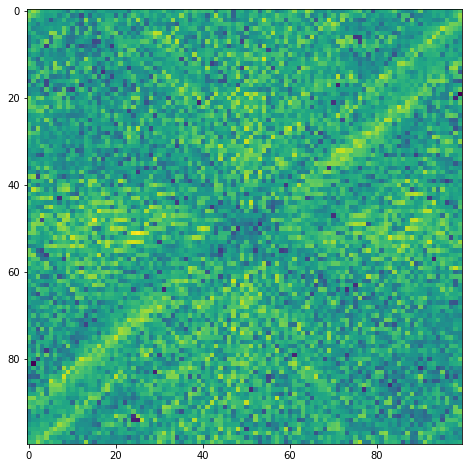

In [31]:
fig = plt.figure(figsize = (10, 8))
imshow(sf)

# Noise Depth != 1, THIS WAS NOT USED

In [ ]:
imgC2 = img3.copy()

In [ ]:
sf = np.stack([
    # Computes the 2D discrete Fourier Transform, then shifts the zero-frequency component to the center of the spectrum. Once for image, one for each channel difference
    np.fft.fftshift(np.fft.fft2(imgC2)),
    np.fft.fftshift(np.fft.fft2(imgC2[:,:,0] - imgC2[:,:,1])),
    np.fft.fftshift(np.fft.fft2(imgC2[:,:,1] - imgC2[:,:,2])),
    np.fft.fftshift(np.fft.fft2(imgC2[:,:,2] - imgC2[:,:,0])),
], axis = 1)

In [ ]:
imgC2.shape

In [36]:
FILES = np.arange(start = 0, stop = 400)
FILES

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [37]:
gap = int(len(FILES) / 4)
gap

100

In [39]:
n = 4
FILES[(n-1)*gap:]

array([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399])

In [41]:
LABELS = ['FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE',]

In [42]:
labels_set = np.array(LABELS)
labels_set

array(['FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'FAKE'], dtype='<U4')

In [43]:
pos = np.where(labels_set == 'REAL')
pos

(array([ 5,  9, 17]),)

In [44]:
labels_set = np.zeros(shape = (len(LABELS), 1))
labels_set

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [45]:
labels_set[pos[0], 0] = 1
labels_set

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [54]:
real_pos = np.arange(0, 56, 3).tolist()
real_pos

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54]

In [55]:
fake_pos = np.arange(1, 100, 2).tolist()
fake_pos

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [56]:
len(real_pos)*0.5+1

10.5

In [57]:
len(fake_pos)*0.7+1

36.0

In [58]:
real_pos[0:int(len(real_pos)*0.5+1)]*4


[0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27]

In [59]:
fake_pos[0:int(len(fake_pos)*0.7+1)]

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71]

In [60]:
real_pos[0:int(len(real_pos)*0.5+1)]*4 + fake_pos[0:int(len(fake_pos)*0.7+1)]

[0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71]

In [61]:
x = np.zeros(shape = (3, 20, 100, 1))
x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [62]:
x[0][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [63]:
np.ndarray.mean(x, axis = 2)

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])

In [65]:
np.ndarray.mean(x, axis = 2).shape

(3, 20, 1)